In [1]:
#导入Python库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2


In [2]:
pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', LinearSVC())
])

N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)

In [4]:
digits = load_digits()

In [5]:
grid.fit(digits.data, digits.target)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'reduce_dim': [PCA(copy=True, iterated_power=7, n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=8, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, ver...ction chi2 at 0x0000020DE6746A60>)], 'reduce_dim__k': [2, 4, 8], 'classify__C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scorin

In [6]:
# 模型性能评价
mean_scores = np.array(grid.cv_results_['mean_test_score'])
print(mean_scores)

[ 0.45297718  0.73400111  0.84474124  0.32109071  0.65831942  0.82025598
  0.3377852   0.5770729   0.80133556  0.32665554  0.65831942  0.82804674
  0.19643851  0.46466333  0.78408459  0.29159711  0.65998887  0.82693378
  0.13578186  0.51363383  0.79187535  0.23539232  0.51363383  0.78185865
  0.30773511  0.47579299  0.68002226  0.26043406  0.41903172  0.62103506
  0.19254313  0.32888147  0.47301057  0.16527546  0.29994435  0.47968837]


In [8]:
mean_scores1 = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
print(mean_scores1)

[[[ 0.45297718  0.73400111  0.84474124]
  [ 0.32109071  0.65831942  0.82025598]
  [ 0.3377852   0.5770729   0.80133556]]

 [[ 0.32665554  0.65831942  0.82804674]
  [ 0.19643851  0.46466333  0.78408459]
  [ 0.29159711  0.65998887  0.82693378]]

 [[ 0.13578186  0.51363383  0.79187535]
  [ 0.23539232  0.51363383  0.78185865]
  [ 0.30773511  0.47579299  0.68002226]]

 [[ 0.26043406  0.41903172  0.62103506]
  [ 0.19254313  0.32888147  0.47301057]
  [ 0.16527546  0.29994435  0.47968837]]]


In [9]:
mean_scores2 = mean_scores1.max(axis = 0)
print(mean_scores2)

[[ 0.45297718  0.73400111  0.84474124]
 [ 0.32109071  0.65831942  0.82025598]
 [ 0.3377852   0.65998887  0.82693378]]


In [10]:
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)
print(bar_offsets)

[ 0.5  4.5  8.5]


In [15]:
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

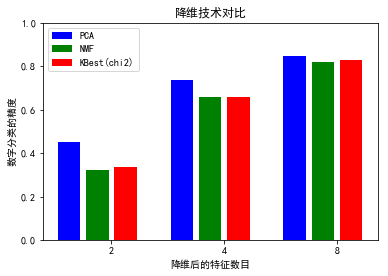

In [17]:
# 数据可视化
plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores2)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("降维技术对比")
plt.xlabel('降维后的特征数目')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('数字分类的精度')
plt.ylim((0, 1))
plt.legend(loc='upper left')

### 参考资料：

1 [**Selecting dimensionality reduction with Pipeline and GridSearchCV**](http://scikit-learn.org/stable/auto_examples/plot_compare_reduction.html)
